In [111]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

import PySpice.Logging.Logging as Logging
from PySpice.Spice.Netlist import Circuit, SubCircuit
from PySpice.Unit import *
logger = Logging.setup_logging()

from solar_cell import SolarCell
from solar_module import SolarModule, generate_gaussian
from string_to_embedding import string_to_embedding, super_to_embedding
from circuit_embedding import CircuitEmbedding

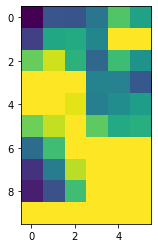

In [36]:
s = generate_gaussian(20, 10, 6, diag='r')
plt.imshow(s)

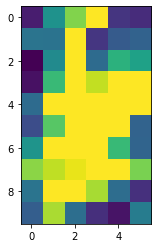

In [38]:
shading_list = [generate_gaussian(20, 10, 6, diag='r') for x in range(0, 10000)]
plt.imshow(shading_list[8293])

In [ ]:
shading_series = pd.Series(data=shading_list)
shading_series.to_csv('shading_series')

In [99]:
importfile = 'T02P5' # filename of Excel dataset
importfile = 'Datasets/' + importfile + '.xlsx'

In [100]:
# Save and append to embedding_series.txt 
importdf = pd.read_excel(importfile, usecols='A,C', nrows = 50)
importdf["SuperString"]
importdf.to_csv('embedding_series', mode='a', columns=["SuperString"], header=False)

In [108]:
# Read embedding_series.txt
df = pd.read_csv('embedding_series', header=0, names = ['#', 'SuperString'], usecols=[1])
print(df)

                                           SuperString
0    [-(9495)+][-9091(9392)+][-42450405+-(102435230...
1    [-95(8575)+][-(949282908191938083)84+]+-{[-(05...
2    [-03(0504)+][-0001+-02+][-40743490703285918480...
3    [-9594+][-9391(9092)+][-314005+-413424+-210320...
4    {[-651505258535+-55+-(954575)+][-4074000432701...
..                                                 ...
994  {[-7450656263605554707371(726164517552)53+][-3...
995  [-434424942393333484+-539273+-4282646222745263...
996  [-94+-9293+][-95+]{[-1214001335200210311533242...
997  [-3122250020021324+-1412331001351104+-23340515...
998  [-5440415053(435152)(4244)+]{[-849563656475(93...

[999 rows x 1 columns]


In [115]:
# take first shading map and simulate it for all strings
shading_map = shading_series[0]
d = {}

failed_string = []
for string in df['SuperString']:
    moduleobj = super_to_embedding(10, 6, string)
    moduleobj.make_netlist()
    try:
        moduleobj.simulate()
        d[string] = [moduleobj.MPP, moduleobj.VMP, moduleobj.IMP, moduleobj.VOC, moduleobj.ISC, moduleobj.FF]
    except:
        failed_string.append(string)

Error! Super String: [-812375906352(9583)607085743591537141306422922124436132545120653142848280403472335025455544(62739394)+][-(131400101204010305)(150211)+]
Error! Super String: [-909392(919495)+][-142355222445647141601002207040325021804203530163254312756562136181847444733033313411855172521535(00825405)(8304)+]
Error! Super String: {[-1505+][-(9311243002941380500004524254327310849283334363534062906472239170743422826121412012033171814414016051)+][-(2565554595)85(3575)+]}
Error! Super String: [-7372815264635471707493535180658450629560(61948555919290)(758283)+]{[-2545330315052324043414(4413)(4335)+][-01113032423141002021(02401012)22+]}
Error! Super String: [-536491549561948162846582529355807050859083609263727375715174+]{[-322111312212(1001)+-2042(304002)(0041)+][-341443051544032313(2535042433)45+]}
Error! Super String: [-725022814020909162926032706151411221828000013171425230021011+]{[-64444575945363(7443557383549584658593)+][-(3413)0525351523(0314243304)+]}
Error! Super String: [-5085515

In [116]:
print(d)

{'[-(9495)+][-9091(9392)+][-42450405+-(1024352302406472441422117541718234800120121354618131603230835062745155216333730315255200705385436584)+]': [331.18271863567634, 0.6800000000000004, 487.03340975834726, 0.7600000000000005, 509.9999737743518, 0.8544446224613851], '[-95(8575)+][-(949282908191938083)84+]+-{[-(05452515653555)+][-(70330143634261206273521444722111122254100350742432047123410213313060405164345300)+]}': [33.369891531280885, 3.4399999999999706, 9.700549863744527, 3.839999999999962, 10.00001813087673, 0.8690060163763522], '[-03(0504)+][-0001+-02+][-407434907032859184807264615231+-(812243136342755510453521536014231573544195839230259465713311244420821262519350)+]': [259.81851360357075, 0.6800000000000004, 382.0860494170156, 0.7600000000000005, 399.99996504831864, 0.8546662378496951], '[-9594+][-9391(9092)+][-314005+-413424+-210320437115015060+-(258235148012532200548545610272757051328184735513105263834464043033427423621165)+]': [273.4184912225466, 0.6800000000000004, 402.08601650